In [52]:
import numpy as np
import matplotlib.pyplot as plt
au_to_kcal_conversion = 627.509474

In [65]:
r_array = np.loadtxt('vqe_standard_data.txt', delimiter=',', skiprows=1)[:,0]
standard_vqe_data = np.loadtxt('vqe_standard_data.txt', delimiter=',', skiprows=1)[:,1]
adapt_vqe_data = np.loadtxt('adapt_vqe_data.txt', delimiter=',', skiprows=1)[:,1]
fci_data = np.loadtxt('fci_data.txt', delimiter=',', skiprows=1)[:,1]
hf_data = np.loadtxt('hf_data.txt', delimiter=',', skiprows=1)[:,1]

In [63]:
fci_data.min()

-1.1361894540659225

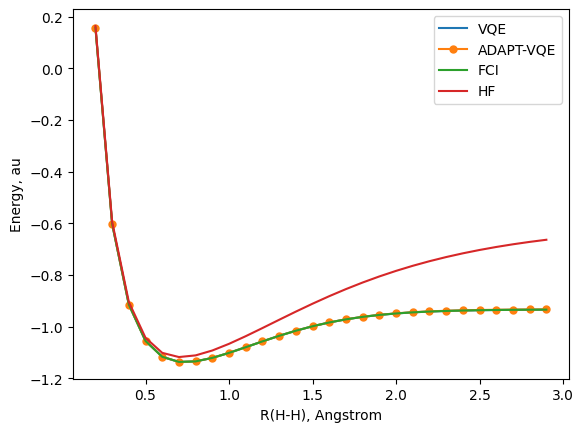

In [66]:
plt.plot(r_array, standard_vqe_data, label='VQE')
plt.plot(r_array, adapt_vqe_data, label='ADAPT-VQE', marker='o', markersize=5)
plt.plot(r_array, fci_data, label='FCI')
plt.plot(r_array, hf_data, label='HF')

plt.ylabel("Energy, au")
plt.xlabel("R(H-H), Angstrom")
plt.legend()

In [67]:
hf_data = abs(hf_data - fci_data)*au_to_kcal_conversion
standard_vqe_data = abs(standard_vqe_data - fci_data)*au_to_kcal_conversion
adapt_vqe_data = abs(adapt_vqe_data - fci_data)*au_to_kcal_conversion

In [41]:
print(adapt_vqe_data)

[ 1.11076970e-04  6.34393502e-05  3.75014771e-05  2.11489709e-05
  9.93242340e-06  2.02896795e-06 -3.36549497e-06 -4.39858011e-06
  2.41441616e-05  2.35055438e-04  1.22711530e-03  4.63547240e-03
  1.36572902e-02  3.27469292e-02  6.60234409e-02  1.15077589e-01
  1.77665997e-01  2.48221298e-01  3.19756658e-01  3.85947893e-01
  4.42433165e-01  4.87111091e-01  5.19750166e-01  5.41340791e-01
  5.53489702e-01  5.57982123e-01  5.56520093e-01  5.50595600e-01]


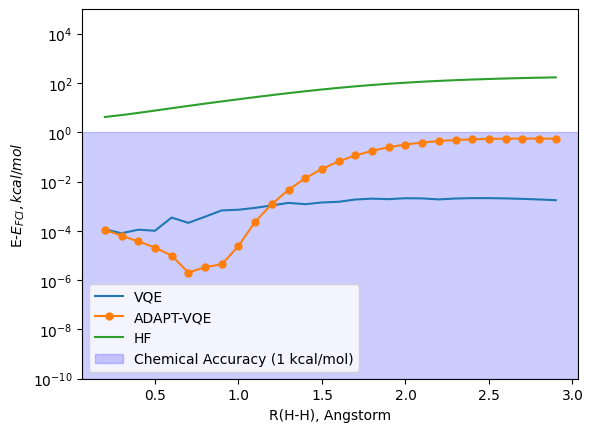

In [70]:
plt.plot(r_array, standard_vqe_data, label='VQE')
plt.plot(r_array, adapt_vqe_data, label='ADAPT-VQE', marker='o', markersize=5)
plt.plot(r_array, hf_data, label='HF')
plt.yscale('log')
plt.ylim(1e-10, 1e5)
plt.xlabel("R(H-H), Angstorm")
plt.ylabel("E-$E_{FCI}, kcal/mol$")

plt.axhspan(ymin=1e-10, ymax=1e0, color='blue', alpha=0.2, label='Chemical Accuracy (1 kcal/mol)')
plt.legend()
plt.show()

In [47]:
print(adapt_vqe_data)

[ 1.11076970e-04  6.34393502e-05  3.75014771e-05  2.11489709e-05
  9.93242340e-06  2.02896795e-06 -3.36549497e-06 -4.39858011e-06
  2.41441616e-05  2.35055438e-04  1.22711530e-03  4.63547240e-03
  1.36572902e-02  3.27469292e-02  6.60234409e-02  1.15077589e-01
  1.77665997e-01  2.48221298e-01  3.19756658e-01  3.85947893e-01
  4.42433165e-01  4.87111091e-01  5.19750166e-01  5.41340791e-01
  5.53489702e-01  5.57982123e-01  5.56520093e-01  5.50595600e-01]


In [49]:
print(standard_vqe_data)

[1.15614315e-04 8.04198895e-05 1.11539595e-04 1.01403396e-04
 3.47605015e-04 2.11621076e-04 3.75122783e-04 6.78205396e-04
 7.20740365e-04 8.57061354e-04 1.07892950e-03 1.36850315e-03
 1.20991452e-03 1.42161056e-03 1.51331379e-03 1.87740558e-03
 2.02983964e-03 1.93656676e-03 2.11031603e-03 2.08120082e-03
 1.89371453e-03 2.05782746e-03 2.13176135e-03 2.13211236e-03
 2.07890928e-03 1.99067736e-03 1.88232916e-03 1.76481978e-03]


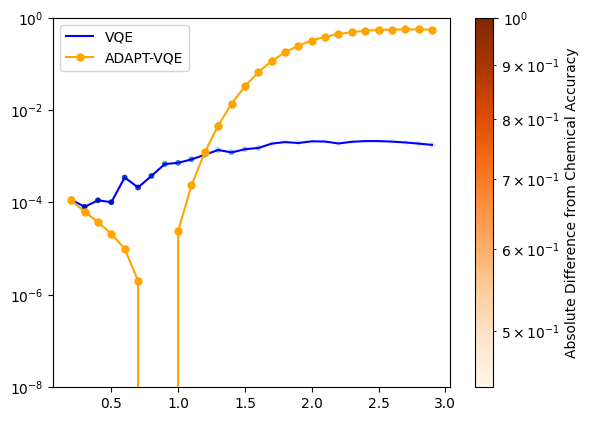

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Assuming you have r_array, standard_vqe_data, and adapt_vqe_data defined
# Also, assuming you have a reference value for "chemical accuracy," let's call it reference_value

reference_value = 1 # Replace with your reference value

# Calculate the absolute difference between the data and the reference value
diff_standard_vqe = np.abs(standard_vqe_data - reference_value)
diff_adapt_vqe = np.abs(adapt_vqe_data - reference_value)

# Plot with a logarithmic scale and color gradient
plt.plot(r_array, standard_vqe_data, label='VQE', color='blue')
plt.plot(r_array, adapt_vqe_data, label='ADAPT-VQE', marker='o', markersize=5, color='orange')

# Set y-axis to logarithmic scale
plt.yscale('log')

# Set the range of the y-axis
plt.ylim(1e-8, 1e0)

# Use a colormap for the color gradient based on the absolute difference
plt.scatter(r_array, standard_vqe_data, c=diff_standard_vqe, cmap='Blues', norm=LogNorm(), s=10)
plt.scatter(r_array, adapt_vqe_data, c=diff_adapt_vqe, cmap='Oranges', norm=LogNorm(), s=10)

# Add a colorbar to indicate the scale
cbar = plt.colorbar()
cbar.set_label('Absolute Difference from Chemical Accuracy')

plt.legend()
plt.show()


In [12]:
E_fci = -1.1372633205048763

In [14]:
standard_vqe_data -= E_fci
adapt_vqe_data -= E_fci

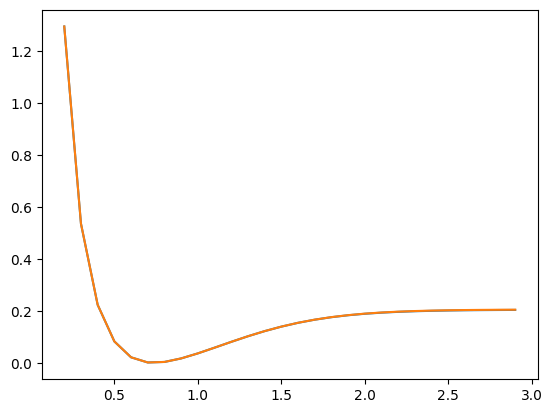

In [15]:
plt.plot(r_array, standard_vqe_data, label='VQE')
plt.plot(r_array, adapt_vqe_data, label='ADAPT-VQE')